In [3]:
import pandas as pd
import umap
import random
from transformers import BertTokenizer, BertModel
from utils import config
t_data = pd.read_csv(f"{config.DATA_PATH}/train.csv")
t_data.head()
t_data.shape

(36765, 5)

# TASK:
## Type: Multi-Class Classification
Three classes:
    * Adequate
    * Effective
    * Ineffective
## Data:
    discourse_id
    essay_id
    discourse_text (a small collection of sentences from a larger essay - things could be effective only in conjunciton with other sentences......)
    discourse_type
    discourse_effectiveness


## PREPROCESSING PROBLEMS:
    Text length can be quite long - summarization model?


In [2]:
t_data["discourse_text"][0]

"Hi, i'm Isaac, i'm going to be writing about how this face on Mars is a natural landform or if there is life on Mars that made it. The story is about how NASA took a picture of Mars and a face was seen on the planet. NASA doesn't know if the landform was created by life on Mars, or if it is just a natural landform. "

In [6]:
print(len(t_data[t_data["discourse_effectiveness"] == "Adequate"]))
print(len(t_data[t_data["discourse_effectiveness"] == "Effective"]))
print(len(t_data[t_data["discourse_effectiveness"] == "Ineffective"]))


20977
9326
6462


In [12]:
cls_tokens_no_discourse_type = pd.read_csv(f"{config.DATA_PATH}/bert_embeddings_train.csv", index_col="Index")

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


mapper = umap.UMAP(random_state=255530)
cls_tokens_no_discourse_type_reduced = mapper.fit_transform(cls_tokens_no_discourse_type)


# Ineffective = blue
# Effective = Red
# Adequate = Green
label_to_number = {
    "Ineffective": 0,
    "Adequate": 1,
    "Effective": 2
}


cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0, 3, 4)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
sc = ax.scatter(cls_tokens_no_discourse_type_reduced[:, 0], cls_tokens_no_discourse_type_reduced[:, 1], c=[label_to_number[i] for i in t_data["discourse_effectiveness"].values], s=25,
                cmap=cmap, norm=norm)

NameError: name 'cls_tokens_no_discourse_type' is not defined

In [15]:
def plot_by_discourse_type(embeddings, discourse_type: str, filter_adequate: bool = False, dimensions: int = 2):
    if dimensions > 2:
        local_mapper = umap.UMAP(random_state=255530, n_components=3)
        local_reduced = local_mapper.fit_transform(embeddings)
    by_type = list(t_data[t_data["discourse_type"] == discourse_type].index)
    subset = t_data[t_data["discourse_type"] == discourse_type]["discourse_effectiveness"]
    if filter_adequate:
        for idx, value in enumerate(subset):
            if value == "Adequate":
                by_type.remove(subset.index[idx])
    fig, ax = plt.subplots()
    if dimensions > 2:
        ax = plt.axes(projection="3d")
        sc = ax.scatter3D(local_reduced[by_type, 0], local_reduced[by_type, 1], local_reduced[by_type, 2], c=[label_to_number[i] for i in subset.values if (i != "Adequate" and filter_adequate) or not filter_adequate], s=5,
                        cmap=cmap, norm=norm)
    else:
        # TODO: Come back and refactor code.
        local_mapper = umap.UMAP(random_state=255530, n_components=3)
        local_reduced = local_mapper.fit_transform(embeddings)
        sc = ax.scatter(local_reduced[by_type, 0], local_reduced[by_type, 1], c=[label_to_number[i] for i in subset.values if (i != "Adequate" and filter_adequate) or not filter_adequate], s=5,
                        cmap=cmap, norm=norm)

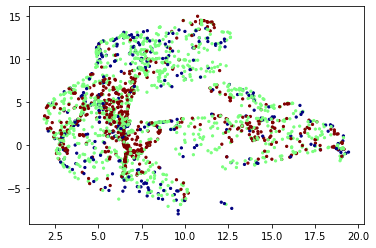

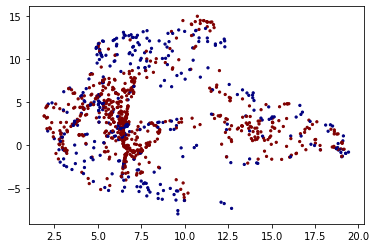

In [16]:
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Lead", filter_adequate=False)
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Lead", filter_adequate=True)

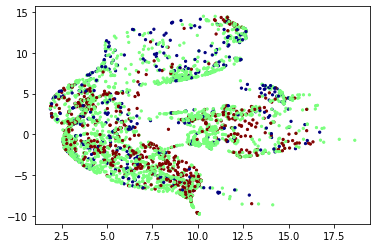

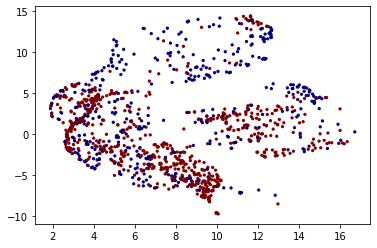

In [17]:
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Position")
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Position", filter_adequate=True)

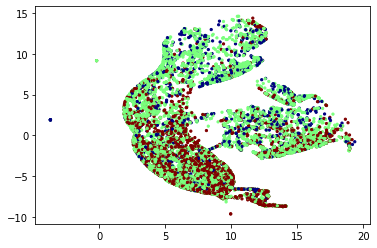

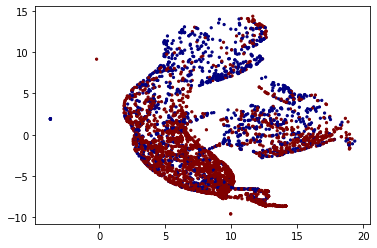

In [18]:
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Claim")
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Claim", filter_adequate=True)

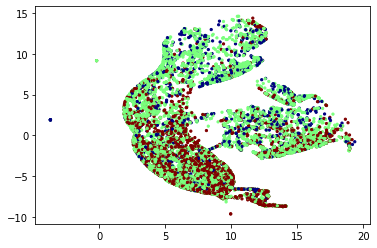

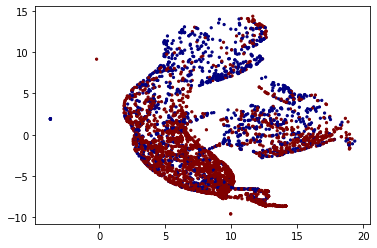

In [19]:
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Claim")
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Claim", filter_adequate=True)

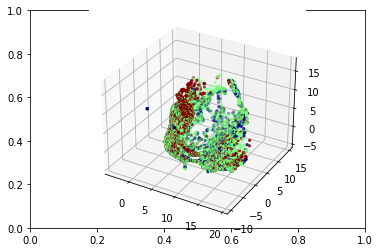

In [20]:
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Claim", dimensions=3, filter_adequate=False)

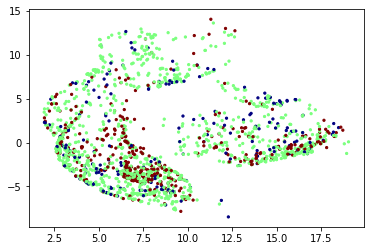

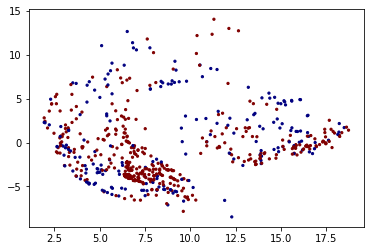

In [21]:
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Counterclaim")
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Counterclaim", filter_adequate=True)

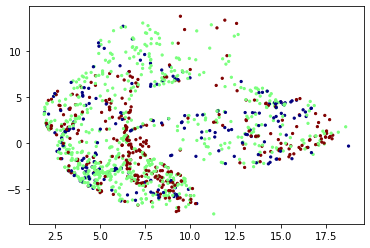

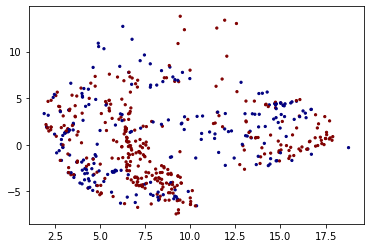

In [22]:
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Rebuttal")
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Rebuttal", filter_adequate=True)

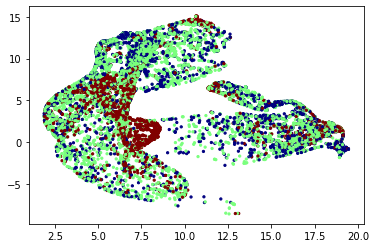

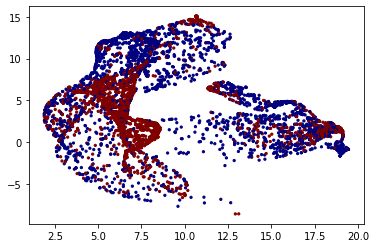

In [23]:
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Evidence")
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Evidence", filter_adequate=True)

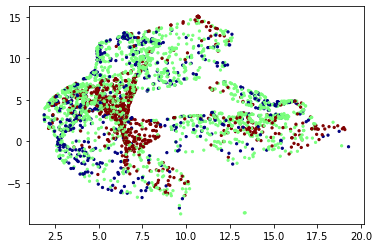

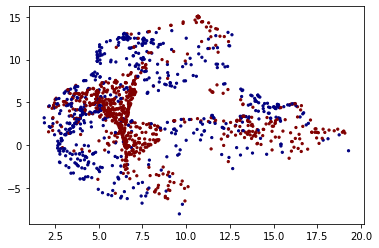

In [24]:
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Concluding Statement")
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Concluding Statement", filter_adequate=True)

In [25]:
t_data.isna().any()

discourse_id               False
essay_id                   False
discourse_text             False
discourse_type             False
discourse_effectiveness    False
dtype: bool

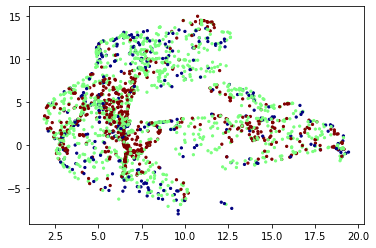

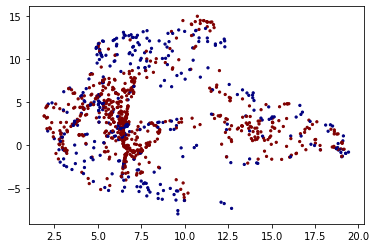

In [26]:
cls_tokens_discourse_type = pd.read_csv(f"{HOME_DIRECTORY}/bert_embeddings_train_included_discourse_type.csv")
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Lead", filter_adequate=False)
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Lead", filter_adequate=True)

In [ ]:
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Position")
plot_by_discourse_type(cls_tokens_no_discourse_type_reduced, "Position", filter_adequate=True)

# Revisit: Using the rubric to guide decision making

## Do all leads have a corresponding position?


In [27]:
all_leads = t_data[t_data["discourse_type"] == "Lead"]
each_has_1_or_none = True
for essay in t_data["essay_id"].unique():
    if len(t_data[(t_data["essay_id"] == essay) & (t_data["discourse_type"] == "Lead")]) >= 2:
        print(t_data[t_data["essay_id"] == essay])
        each_has_1_or_none = False
print("1 lead per essay " if each_has_1_or_none else "multi lead")
lead_has_multi_pos = False
for lead in all_leads["discourse_id"].unique():
    data_for_essay = t_data[t_data["discourse_id"] == lead]
    if len(data_for_essay[data_for_essay["discourse_type"] == "position"]) != 1:
        lead_has_multi_pos = True
print(lead_has_multi_pos)

      discourse_id      essay_id  \
7572  a5ca95e8393d  88B8F8666DA0   
7573  7365f15c0873  88B8F8666DA0   
7574  0c4f99258df4  88B8F8666DA0   
7575  9081cf65d1f7  88B8F8666DA0   
7576  6c61182f03a8  88B8F8666DA0   
7577  f1434a6b39ce  88B8F8666DA0   
7578  7f8b8cfbbbd1  88B8F8666DA0   
7579  be4ab66af0bf  88B8F8666DA0   
7580  02e116445c0a  88B8F8666DA0   
7581  47622869b43c  88B8F8666DA0   

                                         discourse_text        discourse_type  \
7572  We all love our phones now a days and basicall...                  Lead   
7573  .Ever since they were invented in 1700s people...                  Lead   
7574  With all the new technology and apps like face...              Evidence   
7575  With all the crashes maybe we should drive wit...                 Claim   
7576  There putting almost smartphones in the car so...              Evidence   
7577  So you picking up a cellphone and calling some...                 Claim   
7578  there is a responsibility fact

In [1]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [35]:
lengths = []
for position in t_data[t_data["discourse_type"] == "Position"]["discourse_text"]:
    lengths.append(len(tokenizer(position)["input_ids"]))
lengths.sort(reverse=True)
print(lengths)

[115, 108, 87, 87, 86, 86, 85, 84, 81, 80, 78, 77, 76, 76, 75, 75, 74, 74, 73, 73, 73, 73, 72, 72, 72, 71, 71, 70, 69, 69, 69, 68, 67, 67, 67, 67, 66, 66, 66, 66, 66, 65, 65, 64, 64, 63, 63, 63, 63, 63, 63, 62, 62, 62, 61, 61, 61, 61, 61, 61, 61, 61, 61, 60, 60, 60, 59, 59, 59, 59, 58, 58, 58, 58, 58, 58, 58, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 56, 56, 56, 56, 56, 56, 56, 56, 56, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 54, 54, 54, 54, 54, 54, 54, 54, 54, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 45, 45, 4

In [36]:
lengths = []
for position in t_data[t_data["discourse_type"] == "Lead"]["discourse_text"]:
    lengths.append(len(tokenizer(position)["input_ids"]))
lengths.sort(reverse=True)
print(lengths)

Token indices sequence length is longer than the specified maximum sequence length for this model (655 > 512). Running this sequence through the model will result in indexing errors


[655, 402, 345, 309, 301, 300, 258, 252, 251, 245, 243, 239, 237, 236, 235, 234, 233, 232, 220, 219, 219, 217, 215, 214, 214, 213, 211, 208, 207, 207, 203, 202, 202, 200, 198, 197, 196, 196, 192, 190, 188, 188, 187, 186, 185, 185, 181, 177, 176, 175, 174, 173, 173, 171, 171, 170, 170, 168, 167, 166, 165, 165, 165, 164, 163, 163, 162, 162, 161, 161, 160, 159, 159, 159, 158, 156, 156, 155, 155, 154, 154, 154, 154, 153, 153, 153, 153, 152, 152, 152, 152, 152, 152, 150, 150, 150, 150, 150, 148, 147, 147, 147, 147, 147, 146, 146, 146, 145, 145, 144, 144, 144, 144, 143, 143, 143, 142, 142, 141, 140, 140, 139, 139, 138, 138, 138, 138, 137, 137, 137, 137, 136, 136, 136, 136, 136, 136, 135, 135, 135, 135, 135, 134, 134, 134, 134, 134, 133, 133, 133, 132, 132, 131, 131, 131, 131, 131, 131, 131, 130, 130, 130, 130, 130, 129, 129, 129, 129, 129, 129, 129, 128, 128, 128, 128, 128, 127, 127, 127, 126, 126, 126, 126, 126, 126, 126, 125, 125, 125, 125, 124, 124, 124, 124, 124, 124, 124, 124, 123, 123,

In [38]:
lengths = []
for position in t_data[t_data["discourse_type"] == "Claim"]["discourse_text"]:
    lengths.append(len(tokenizer(position)["input_ids"]))
lengths.sort(reverse=True)
print(lengths)

[133, 97, 96, 95, 94, 93, 91, 89, 89, 88, 86, 85, 84, 84, 82, 82, 81, 81, 80, 79, 79, 79, 79, 79, 78, 78, 77, 77, 77, 76, 74, 74, 73, 73, 73, 73, 72, 72, 72, 72, 72, 72, 72, 71, 71, 71, 71, 70, 70, 70, 70, 70, 69, 69, 69, 69, 69, 69, 68, 68, 68, 68, 68, 68, 68, 68, 67, 67, 67, 67, 67, 67, 67, 67, 67, 66, 66, 66, 66, 66, 66, 66, 66, 66, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56

In [40]:
lengths = []
for position in t_data[t_data["discourse_type"] == "Rebuttal"]["discourse_text"]:
    lengths.append(len(tokenizer(position)["input_ids"]))
lengths.sort(reverse=True)
print(lengths)

[338, 205, 175, 149, 149, 146, 142, 141, 140, 136, 135, 135, 133, 131, 131, 129, 127, 125, 122, 120, 119, 117, 114, 110, 110, 108, 108, 108, 107, 107, 106, 106, 106, 105, 105, 100, 100, 100, 99, 99, 97, 96, 95, 95, 94, 94, 93, 92, 90, 90, 90, 89, 89, 89, 89, 88, 88, 88, 88, 87, 87, 86, 86, 85, 85, 85, 85, 84, 83, 83, 83, 83, 82, 82, 82, 82, 82, 81, 81, 80, 79, 79, 79, 78, 78, 78, 78, 78, 78, 78, 77, 77, 76, 76, 76, 75, 75, 75, 74, 74, 74, 74, 74, 73, 72, 72, 72, 71, 70, 69, 69, 69, 69, 69, 69, 69, 68, 68, 68, 68, 68, 67, 67, 67, 67, 67, 66, 66, 66, 66, 66, 65, 65, 65, 65, 65, 65, 65, 64, 64, 64, 64, 64, 64, 63, 63, 63, 63, 63, 62, 62, 62, 62, 62, 62, 61, 61, 61, 61, 61, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 59, 59, 59, 59, 59, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 57, 57, 57, 57, 57, 57, 57, 57, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 55, 55, 55, 55, 55, 55, 55, 55, 54, 54, 54, 54, 54, 53, 53, 53, 53, 53, 53, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 51, 51, 51, 51, 51, 5

[916, 813, 802, 771, 756, 755, 746, 712, 703, 700, 692, 692, 690, 680, 646, 645, 644, 638, 633, 633, 628, 620, 611, 602, 599, 597, 597, 595, 593, 590, 589, 589, 585, 583, 583, 583, 579, 576, 568, 566, 564, 563, 562, 560, 557, 556, 555, 554, 553, 553, 553, 553, 552, 551, 550, 549, 546, 544, 544, 543, 543, 543, 538, 538, 538, 537, 536, 536, 536, 535, 535, 534, 533, 533, 532, 531, 531, 530, 530, 529, 529, 529, 529, 526, 525, 525, 524, 524, 524, 524, 524, 523, 522, 521, 519, 519, 519, 518, 518, 517, 517, 516, 516, 515, 515, 515, 513, 512, 512, 512, 510, 510, 510, 510, 509, 506, 506, 506, 504, 504, 503, 503, 502, 501, 501, 499, 498, 497, 497, 496, 496, 495, 495, 495, 494, 493, 493, 492, 490, 490, 490, 489, 488, 488, 488, 487, 487, 487, 487, 486, 486, 486, 485, 484, 484, 484, 483, 483, 483, 482, 482, 481, 481, 481, 479, 479, 479, 479, 479, 478, 478, 477, 477, 477, 477, 476, 476, 476, 475, 475, 474, 474, 474, 474, 474, 473, 473, 472, 472, 471, 471, 471, 470, 470, 470, 469, 469, 468, 467, 467,

(array([  2.,   9.,  22.,  37.,  72., 111., 173., 218., 258., 265., 316.,
        312., 368., 316., 381., 362., 399., 363., 391., 409., 387., 411.,
        391., 367., 390., 384., 385., 367., 387., 345., 369., 335., 360.,
        360., 351., 338., 354., 297., 318., 333., 332., 271., 309., 268.,
        300., 268., 279., 244., 248., 256., 192., 234., 216., 194., 188.,
        188., 188., 182., 199., 170., 174., 165., 145., 147., 140., 133.,
        146., 113., 122., 121., 125., 112., 120., 108., 117., 110., 104.,
         95., 108.,  97., 100., 114., 120.,  91., 114.,  95.,  86.,  84.,
         84., 105.,  82.,  99.,  84.,  85.,  97.,  89.,  89.,  82.,  83.,
         76.,  84.,  94., 108.,  76.,  87.,  89.,  78.,  74.,  90.,  79.,
         84.,  68.,  98.,  76.,  64.,  87.,  70.,  87.,  74.,  86.,  82.,
         81.,  85.,  67.,  87.,  67.,  71.,  63.,  60.,  73.,  65.,  65.,
         69.,  75.,  83.,  86.,  83.,  65.,  76.,  70.,  67.,  80.,  70.,
         69.,  71.,  74.,  65.,  60., 

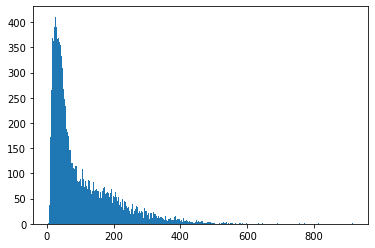

In [9]:
preprocessed_train = pd.read_csv(f"{config.DATA_PATH}/train_split.csv")
preprocessed_val = pd.read_csv(f"{config.DATA_PATH}/val_split.csv")

lengths = []
for position in preprocessed_train["discourse_text"]:
    lengths.append(len(tokenizer(position)["input_ids"]))
for position in preprocessed_val["discourse_text"]:
    lengths.append(len(tokenizer(position)["input_ids"]))

lengths.sort(reverse=True)
print(lengths)
lengths = np.array(lengths)
plt.hist(lengths, bins=np.arange(lengths.min(), lengths.max()+1))

In [13]:
print((preprocessed_train[preprocessed_train["label"] == 0]).shape[0] / preprocessed_train.shape[0])
print((preprocessed_train[preprocessed_train["label"] == 1]).shape[0] / preprocessed_train.shape[0])
print((preprocessed_train[preprocessed_train["label"] == 2]).shape[0] / preprocessed_train.shape[0])

0.5698354413164695
0.25373997008023935
0.17642458860329116
